In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.pyplot import cm

In [4]:
import assaytools

In [5]:
from assaytools import platereader

In [28]:
filenames = [
    'p38_Bos_conc0_20180402_152751.xml',
    'p38_Bos_conc1_20180402_171751.xml', 
    'p38_Bos_conc2_20180402_181751.xml', 
    'p38_Bos_conc3_20180402_191757.xml',
    'p38_Bos_conc4_20180402_201804.xml',
    'p38_Bos_conc5_20180402_211811.xml', 
    'p38_Bos_conc6_20180402_221821.xml', 
    'p38_Bos_conc7_20180402_231830.xml',
    'p38_Bos_conc8_20180403_001902.xml', 
    'p38_Bos_conc9_20180403_011911.xml',
    'p38_Bos_conc10_20180403_021916.xml', 
    'p38_Bos_conc11_20180403_031921.xml', 
    'p38_Bos_conc12_20180403_041152.xml', 
    'p38_Bos_conc13_20180403_051158.xml', 
    'p38_Bos_conc14_20180403_061204.xml', 
    'p38_Bos_conc15_20180403_071209.xml', 
    'p38_Bos_conc16_20180403_081210.xml'
]
datapath = '20180402_kinase_panel_HT_single_well_binding_data'

In [72]:
concentrations = np.array([  0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06, 1.47361260e-06, 
         2.48263378e-06,   4.18255821e-06,   7.04646547e-06,
         1.18713651e-05])


In [73]:
reads = list()
nreads = len(filenames)
for read in range(nreads):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filenames[read]))
    reads.append(read)

/Users/albaness/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/albaness/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3291: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


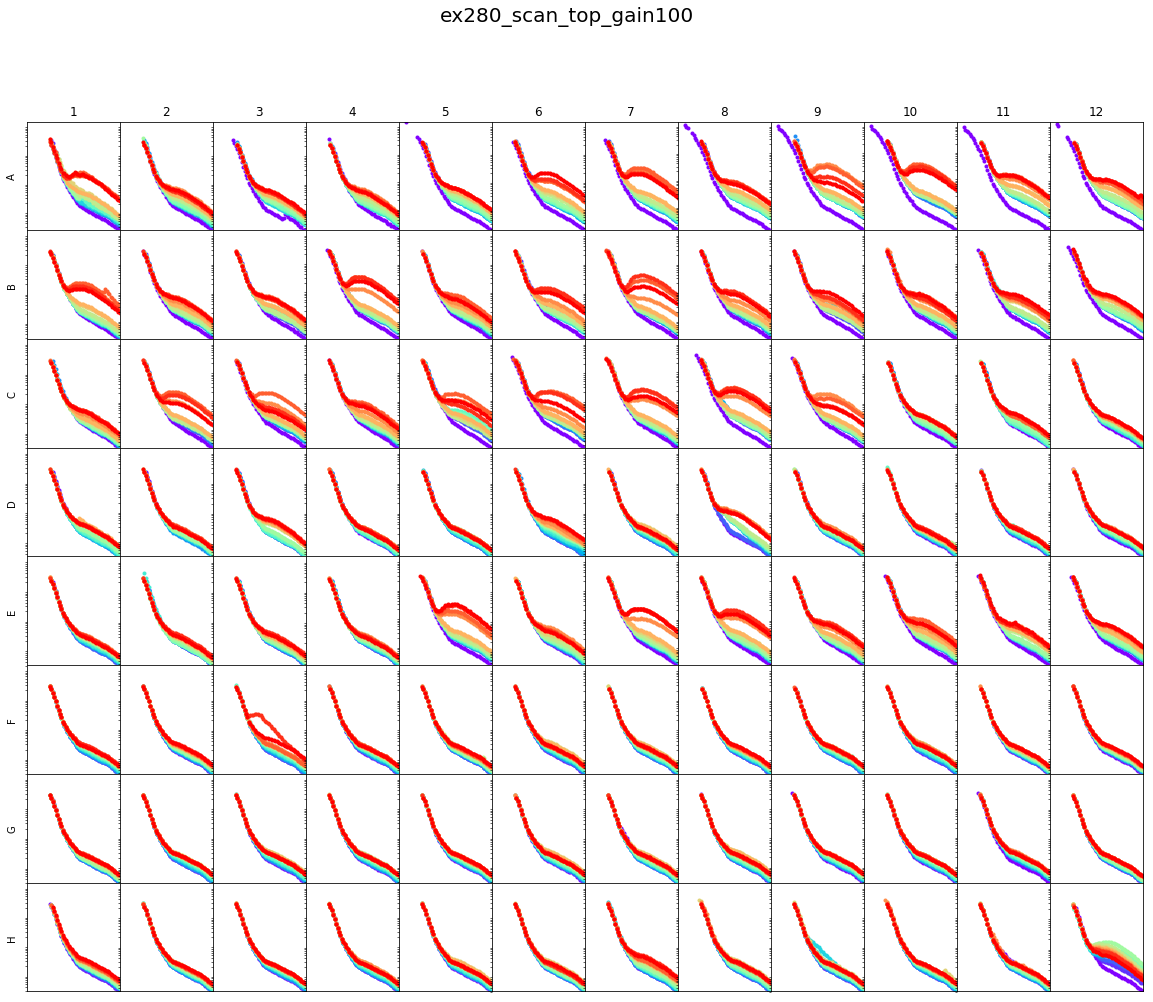

In [74]:
fig = plt.figure(figsize=[20,16])
nrows = 8
ncols = 12
index = 0

label = 'ex280_scan_top_gain100'
data = np.zeros([nrows, ncols, nreads, 65], np.float64)
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        plt.subplot(nrows,ncols,index+1)
        well = row + col
        x_values = list(reads[0][label][well].keys())
        measurements = [list(reads[i][label][well].values()) for i in range(nreads)] 
        for i in range(nreads):
            measurements[i] = [x if x != 'OVER' else 0 for x in measurements[i]]
        data[row_index,col_index,:] = np.array(measurements)

        
ymax = data.max().max().max()
xmax = max(list(reads[0][label][well].keys()))
xmin = min(list(reads[0][label][well].keys()))
           
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        plt.subplot(nrows,ncols,index+1)
        well = row + col
        color=cm.rainbow(np.linspace(0,1,17))
        for read, c in zip(data[row_index,col_index,:], color):
            plt.semilogy(x_values, read, c=c, marker='.', linestyle="None");
        #plt.semilogy(x_values, data[row_index,9,:], 'b.', alpha=.5);
        #plt.semilogy(x_values, data[row_index,10,:], 'y.', alpha=0.5);
        plt.axis([xmin, xmax, 0, ymax])
        plt.xticks([]);
        plt.yticks([]);
        if row_index == 0:
            plt.title(col);
        if col_index == 0:
            plt.ylabel(row);
        index += 1
        
plt.suptitle(label, fontsize=20)
fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig('bos_spectra_%s_logy.pdf' % label, dpi=300)

In [75]:
x_values.index('480')
len(data[0,1,:, x_values.index('480')])
len(concentrations)

17

/Users/albaness/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2400: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


Text(0.5,1,'Row A at 500 nm')

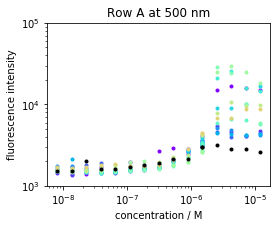

In [76]:
plt.figure(figsize=[4,3]);

color=cm.rainbow(np.linspace(0,1,17))
colorindex = 0
wavelength = '500'
for row in [0]:
    for column in range(ncols):
        plt.loglog(concentrations, data[row,column,:,x_values.index(wavelength)], c=color[colorindex], marker='.', linestyle='None')
        colorindex += 1
    plt.ylim(1000, 100000)
plt.loglog(concentrations, data[4,3,:,x_values.index(wavelength)], c=color[colorindex], color='black', marker='.', linestyle='None')
plt.xlabel('concentration / M');
plt.ylabel('fluorescence intensity');
plt.title('Row A at %s nm' % wavelength)

/Users/albaness/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2400: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


Text(0.5,1,'Row B at 500 nm')

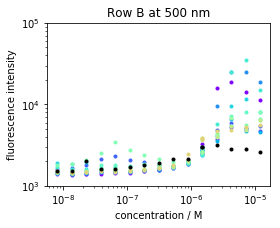

In [77]:
plt.figure(figsize=[4,3]);

color=cm.rainbow(np.linspace(0,1,17))
colorindex = 0
wavelength = '500'
for row in [1]:
    for column in range(ncols):
        plt.loglog(concentrations, data[row,column,:,x_values.index(wavelength)], c=color[colorindex], marker='.', linestyle='None')
        colorindex += 1
    plt.ylim(1000, 100000)
plt.loglog(concentrations, data[4,3,:,x_values.index(wavelength)], c=color[colorindex], color='black', marker='.', linestyle='None')
plt.xlabel('concentration / M');
plt.ylabel('fluorescence intensity');
plt.title('Row B at %s nm' % wavelength)

/Users/albaness/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2400: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


Text(0.5,1,'Row E at 500 nm')

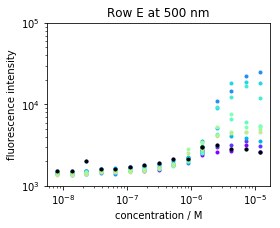

In [78]:
plt.figure(figsize=[4,3]);

color=cm.rainbow(np.linspace(0,1,17))
colorindex = 0
wavelength = '500'
for row in [4]:
    for column in range(ncols)[1:]:
        plt.loglog(concentrations, data[row,column,:,x_values.index(wavelength)], c=color[colorindex], marker='.', linestyle='None')
        colorindex += 1
    plt.ylim(1000, 100000)
plt.loglog(concentrations, data[4,3,:,x_values.index(wavelength)], c=color[colorindex], color='black', marker='.', linestyle='None')
plt.xlabel('concentration / M');
plt.ylabel('fluorescence intensity');
plt.title('Row E at %s nm' % wavelength)

/Users/albaness/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2400: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


Text(0.5,1,'Row C at 500 nm')

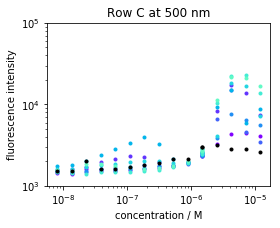

In [79]:
plt.figure(figsize=[4,3]);

color=cm.rainbow(np.linspace(0,1,17))
colorindex = 0
wavelength = '500'
for row in [2]:
    for column in range(ncols)[0:8]:
        plt.loglog(concentrations, data[row,column,:,x_values.index(wavelength)], c=color[colorindex], marker='.', linestyle='None')
        colorindex += 1
    plt.ylim(1000, 100000)
plt.loglog(concentrations, data[4,3,:,x_values.index(wavelength)], c=color[colorindex], color='black', marker='.', linestyle='None')
plt.xlabel('concentration / M');
plt.ylabel('fluorescence intensity');
plt.title('Row C at %s nm' % wavelength)

/Users/albaness/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2400: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


Text(0.5,1,'Row E')

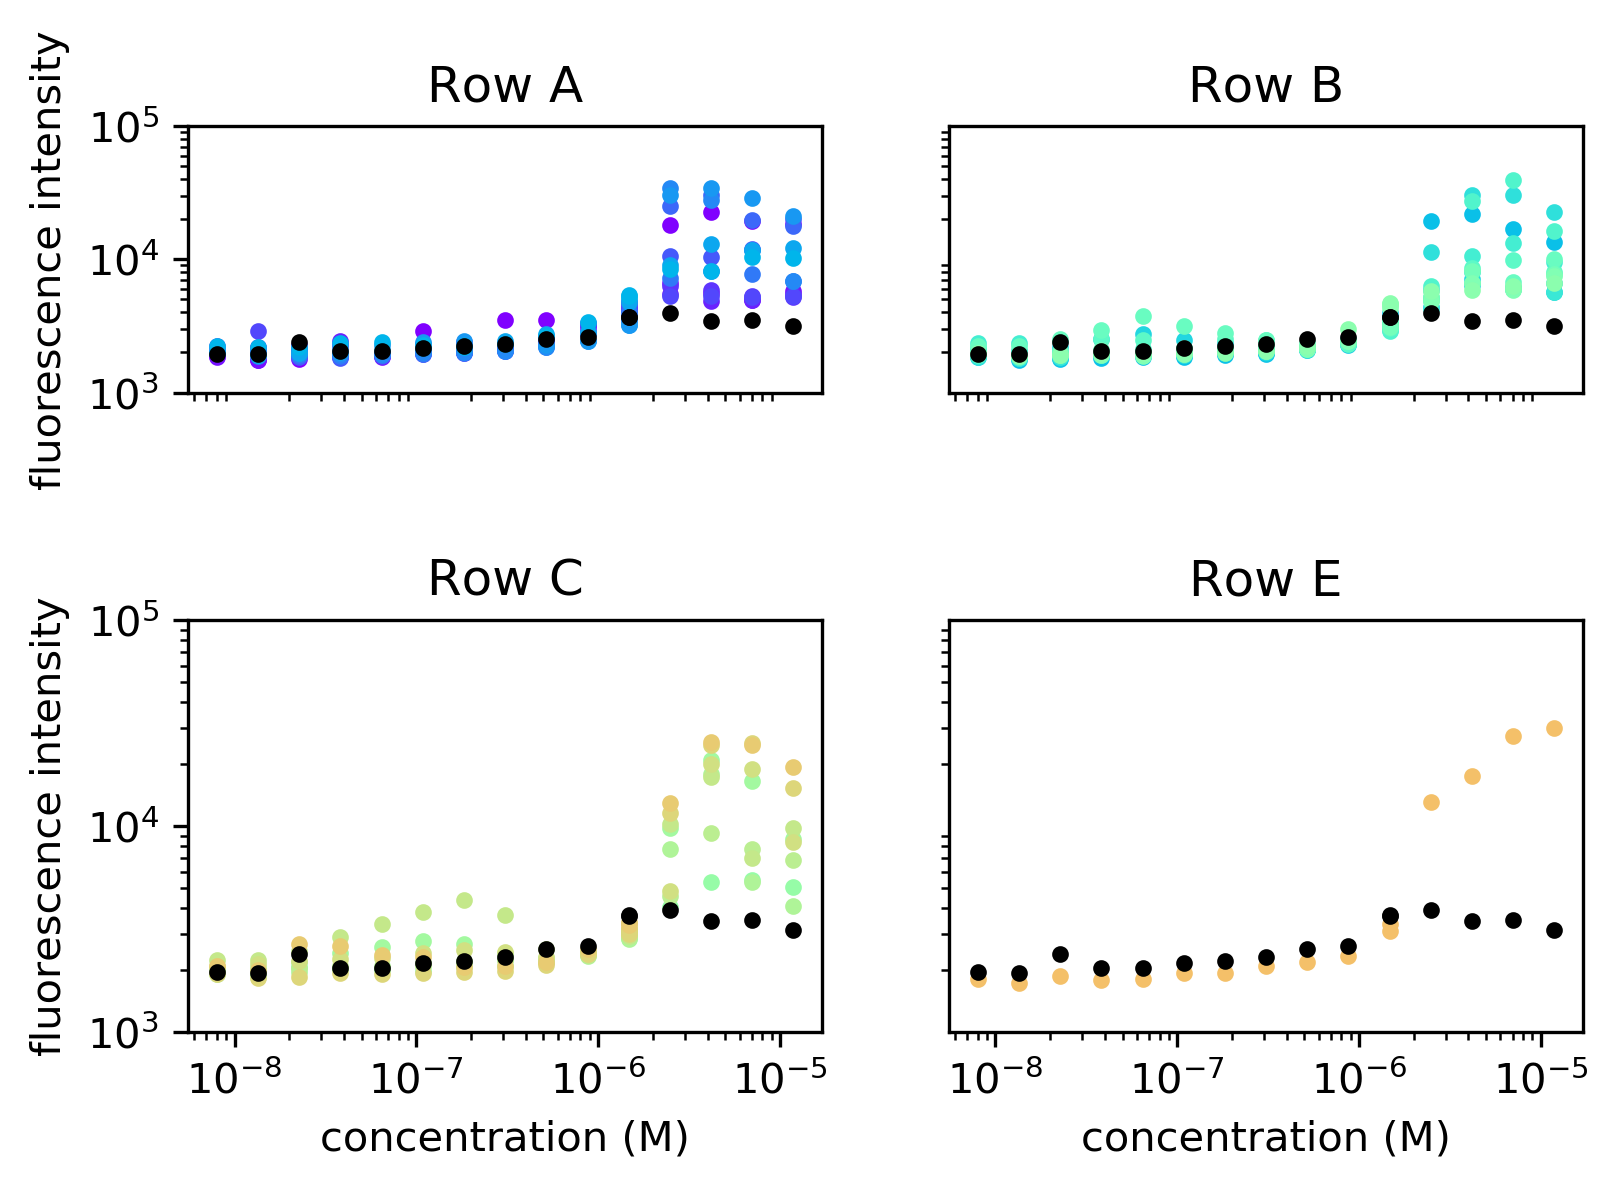

In [89]:
fig = plt.figure(figsize=(6,4), dpi=300)


color=cm.rainbow(np.linspace(0,1,45))
colorindex = 0
wavelength = '480'

ax = fig.add_subplot(3,2,1)
for row in [0]:
    for column in range(ncols):
        plt.loglog(concentrations, data[row,column,:,x_values.index(wavelength)], c=color[colorindex], marker='.', linestyle='None')
        colorindex += 1
plt.ylim(1000, 100000)
plt.loglog(concentrations, data[4,3,:,x_values.index(wavelength)], c=color[colorindex], color='black', marker='.', linestyle='None')
plt.xticks([])
plt.ylabel('fluorescence intensity');
plt.title('Row A')

ax = fig.add_subplot(3,2,2)
for row in [1]:
    for column in range(ncols):
        plt.loglog(concentrations, data[row,column,:,x_values.index(wavelength)], c=color[colorindex], marker='.', linestyle='None')
        colorindex += 1
plt.ylim(1000, 100000)
plt.loglog(concentrations, data[4,3,:,x_values.index(wavelength)], c=color[colorindex], color='black', marker='.', linestyle='None')
plt.yticks([])
plt.xticks([])
plt.title('Row B')

ax = fig.add_subplot(2,2,3)
for row in [2]:
    for column in range(ncols)[0:8]:
        plt.loglog(concentrations, data[row,column,:,x_values.index(wavelength)], c=color[colorindex], marker='.', linestyle='None')
        colorindex += 1
plt.ylim(1000, 100000)
plt.loglog(concentrations, data[4,3,:,x_values.index(wavelength)], c=color[colorindex], color='black', marker='.', linestyle='None')
plt.xlabel('concentration (M)');
plt.ylabel('fluorescence intensity');
plt.title('Row C')

ax = fig.add_subplot(2,2,4)
for row in [4]:
    for column in [4]:
        plt.loglog(concentrations, data[row,column,:,x_values.index(wavelength)], c=color[colorindex], marker='.', linestyle='None')
        colorindex += 1
plt.ylim(1000, 100000)
plt.loglog(concentrations, data[4,3,:,x_values.index(wavelength)], c=color[colorindex], color='black', marker='.', linestyle='None')
plt.xlabel('concentration (M)');
plt.yticks([])
plt.title('Row E')

In [91]:
kinase_pos  = {
    'KC1G1': [0,11], 
    'DYR1A': [0, 10], 
    'VRK3': [0,1], 
    'PMYT1': [0,7], 
    'GAK': [0,2], 
    'KC1G3': [0,5], 
    'MK11': [1, 0], 
    'CSK': [0,3], 
    'STK3': [0,9], 
    'MK14': [0,0], 
    'VRK1': [0,4], 
    'MK13': [1,1], 
    'MK03': [0,8], 
    'FES': [0,6]
}

In [98]:
kinase_pos[list(kinase_pos.keys())[0]][0]


0

/Users/albaness/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2400: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


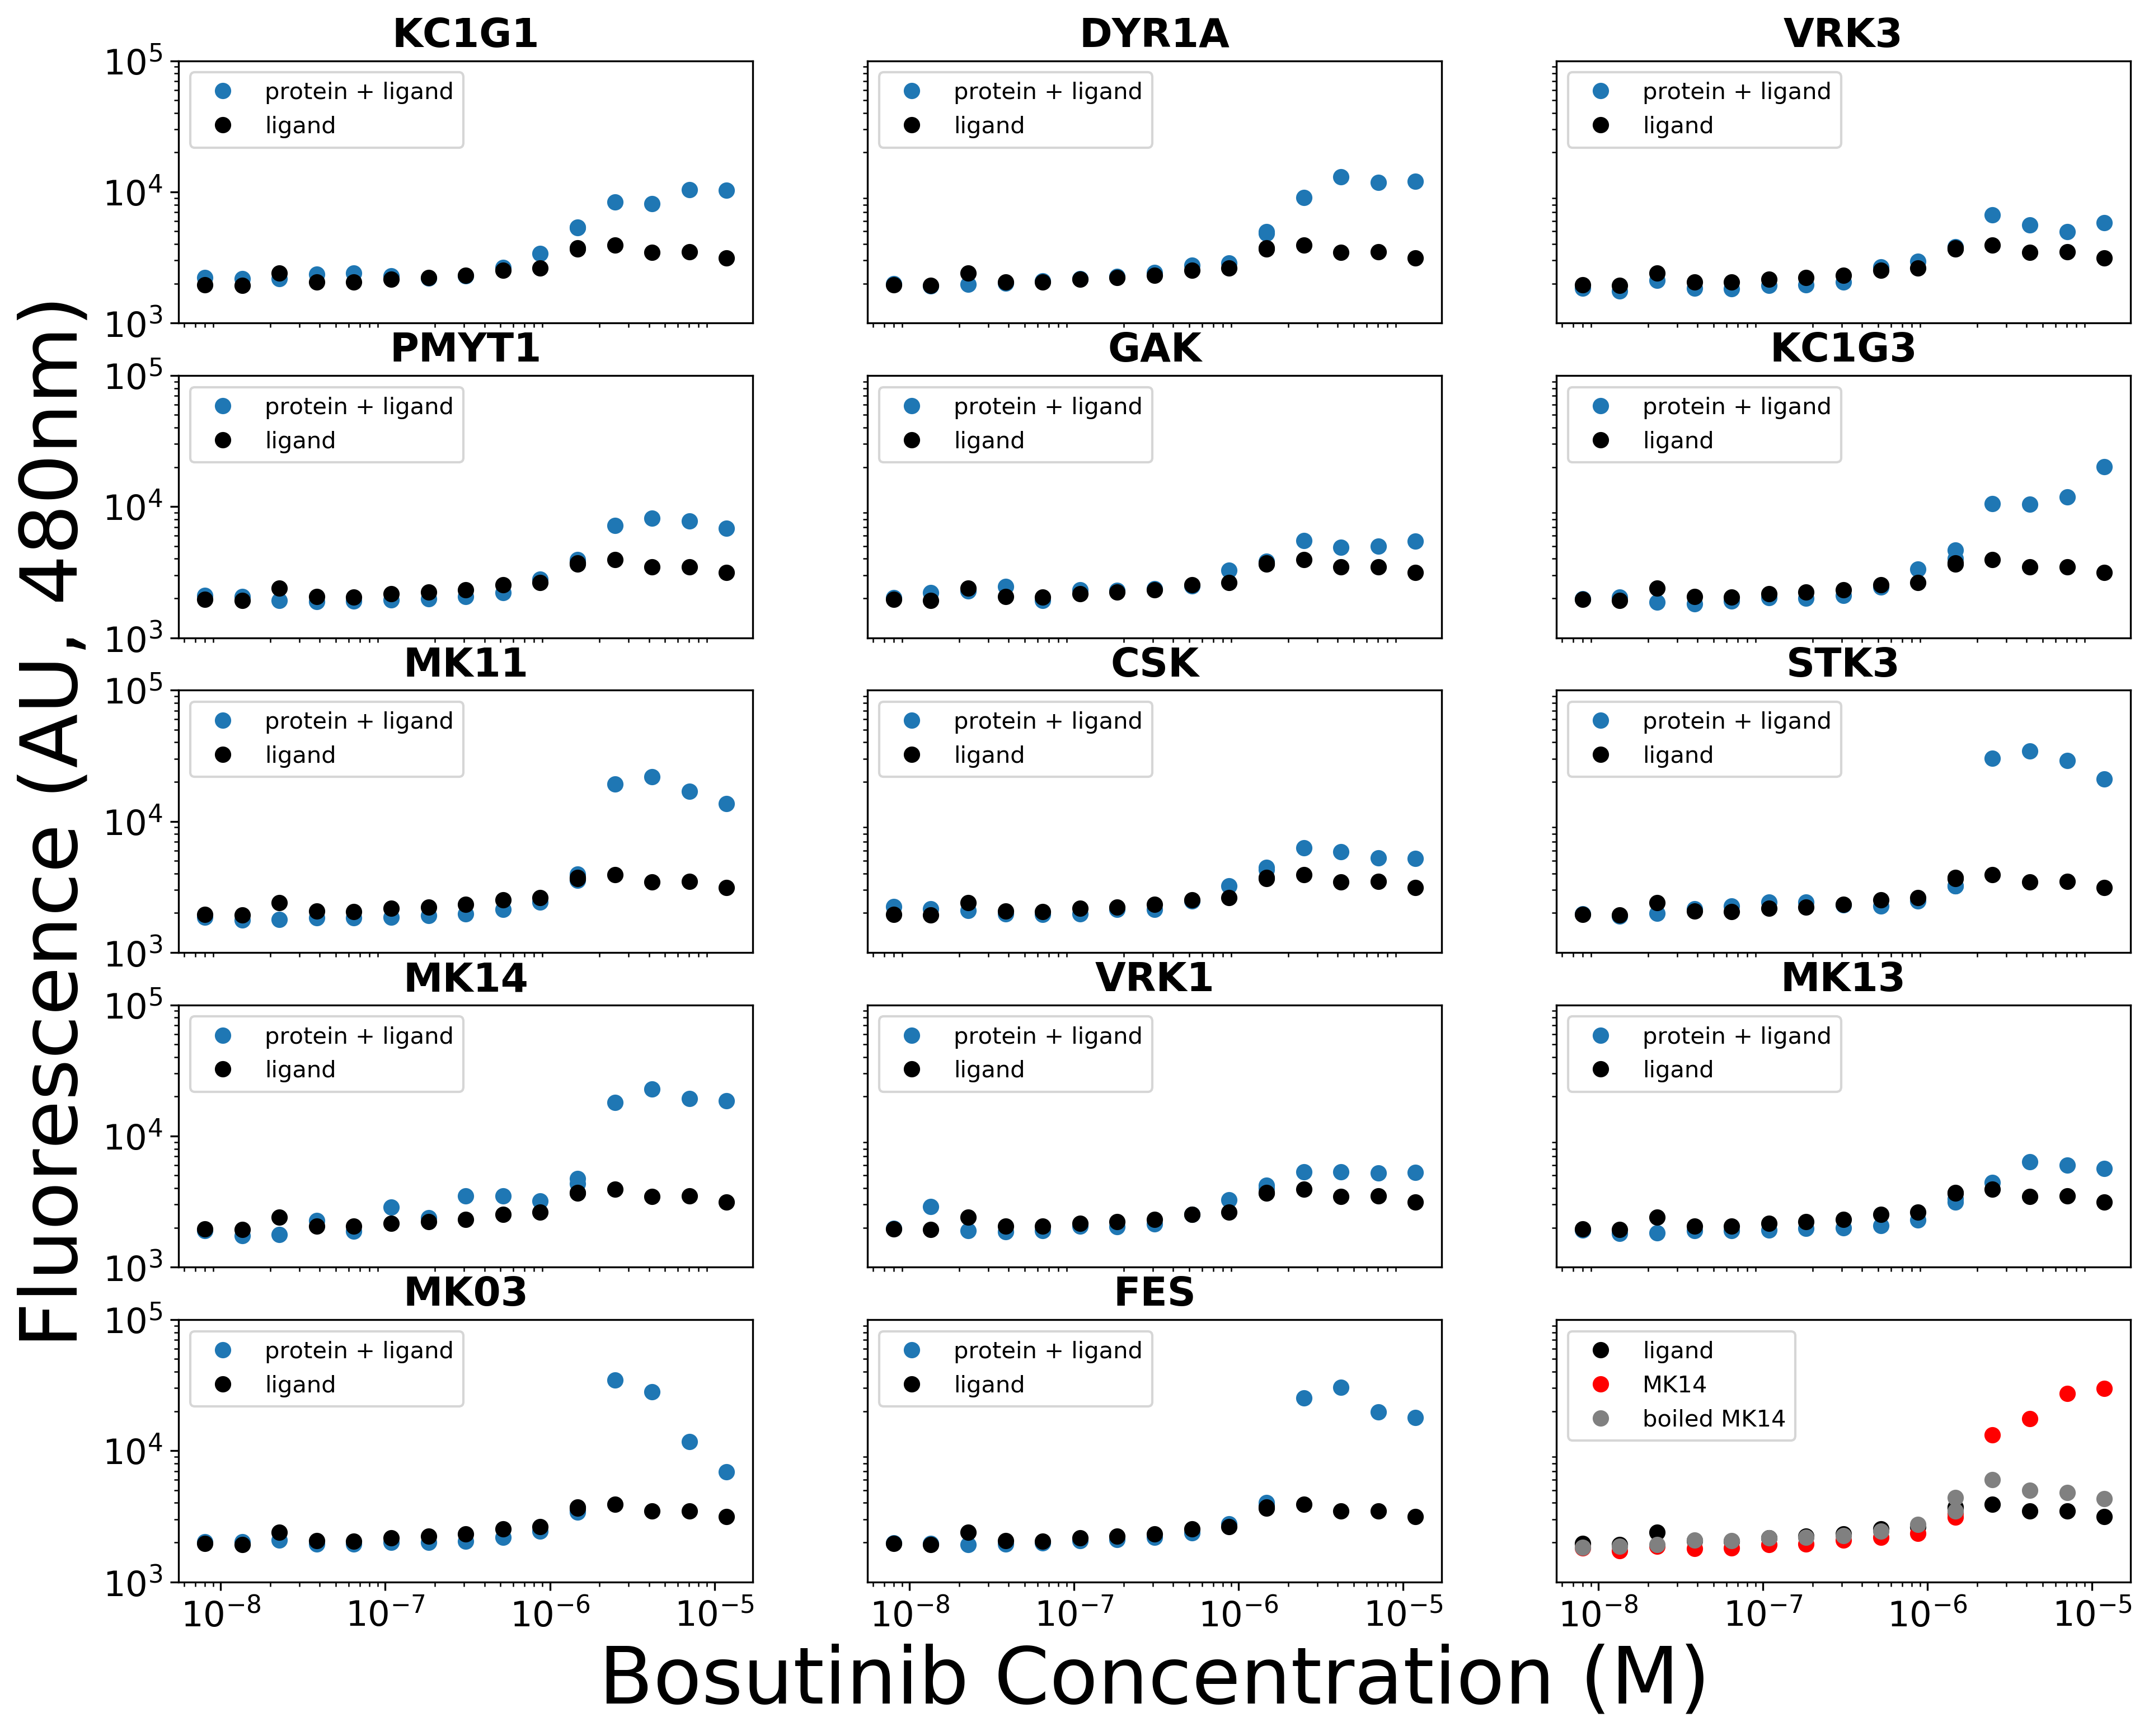

In [149]:
current_palette = sns.color_palette()

wavelength = '480'
fluorescence_color = current_palette[0]
deriv_color = current_palette[3]
lig_color = 'black'
ymax = data.max().max().max()

fig = plt.figure(figsize=(15,12), dpi=300)
for i,kinase in enumerate(list(kinase_pos.keys())):
    row = kinase_pos[kinase][0]
    column = kinase_pos[kinase][1]
    index = i + 1
    ax1 = fig.add_subplot(5,3,index)
    
    if i == 13: 
        plt.xlabel('Bosutinib Concentration (M)', fontsize=34)
    if i == 6: 
        plt.ylabel('Fluorescence (AU, 480nm)', fontsize=34)

    # Plot fluorescence
    plt.loglog(concentrations, data[row,column,:,x_values.index(wavelength)], c=fluorescence_color, marker='.', linestyle='None', markersize=12)
    plt.loglog(concentrations, data[4,3,:,x_values.index(wavelength)], c=color[colorindex], color='black', marker='.', linestyle='None', markersize=12)
    ax1.set_ylim(1000, 100000)
    #ax1.set_ylim(0, math.kymax)
    ax1.yaxis.set_tick_params(labelsize=15)
    ax1.xaxis.set_tick_params(labelsize=15)
    plt.legend(['protein + ligand', 'ligand'], loc=2)
    
    # Title subplot
    plt.title('%s' % kinase, fontsize=17, fontweight='bold')  
    
    if i < 12:
        ax1.xaxis.set_ticks([])
    if i not in [0, 3, 6, 9, 12]:
        ax1.yaxis.set_ticks([])
    
    

# Plot no detectable expression case
ax1 = fig.add_subplot(5,3,15)
plt.loglog(concentrations, data[4,3,:,x_values.index(wavelength)], c=color[colorindex], color='black', marker='.', linestyle='None', markersize=12)
plt.loglog(concentrations, data[4,4,:,x_values.index(wavelength)], c=color[colorindex], color='red', marker='.', linestyle='None', markersize=12)
plt.loglog(concentrations, data[4,5,:,x_values.index(wavelength)], c=color[colorindex], color='grey', marker='.', linestyle='None', markersize=12)
ax1.set_ylim(1000, 100000)
ax1.yaxis.set_ticks([])
ax1.xaxis.set_tick_params(labelsize=15)
# Make sure something is plotted for the derivative
#y = y * 0
#ax1.plot(temps4, y, color=deriv_color, linestyle=':')
#ax1.xaxis.set_ticks([30, 40, 50, 60, 70, 80, 90])
#plt.title('No detectable kinase expression', fontsize=18, fontweight='bold')

plt.legend(['ligand', 'MK14', 'boiled MK14']);

# Save figure
#fig.tight_layout()
fig.savefig('bos_15panel.pdf', dpi=300)